In [0]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Python/MID'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [1]:
import os
from itertools import product

import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels import distributions
from matplotlib import pyplot as plt
from scipy import stats
from sklearn import metrics
from tqdm import tqdm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
sns.set()

In [0]:
class ECDF:
    """
    Empirical Cumulative Distribution Function Estimator
    """
    def __init__(self, realization: np.array):
        """
        :param realization: random variable realization for which
                            cumulative distribution will be estimated,
                            must have at least 2 samples
        """
        self.density = np.sort(realization)

    def _value(self, x):
        # np.where works like indicator function
        return np.sum(np.where(x >= self.density)[0].shape[0]) / self.density.shape[0]

    def __call__(self, x: float) -> float:
        """
        Returns cumulative distribution function value at any point

        :param x: value or array of values to compute CDF for

        :return: array of CDF values
        """
        return np.vectorize(self._value)(x)

In [0]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

In [0]:
n_samples = 10000
true_cdf = stats.norm.cdf(np.linspace(0, 1, 1000))
ecdf = ECDF(stats.norm.rvs(size=n_samples) + (stats.uniform.rvs(size=n_samples, scale=0.2) - 0.1))
estimated_cdf = ecdf(np.linspace(0, 1, 1000))

5.26E-06


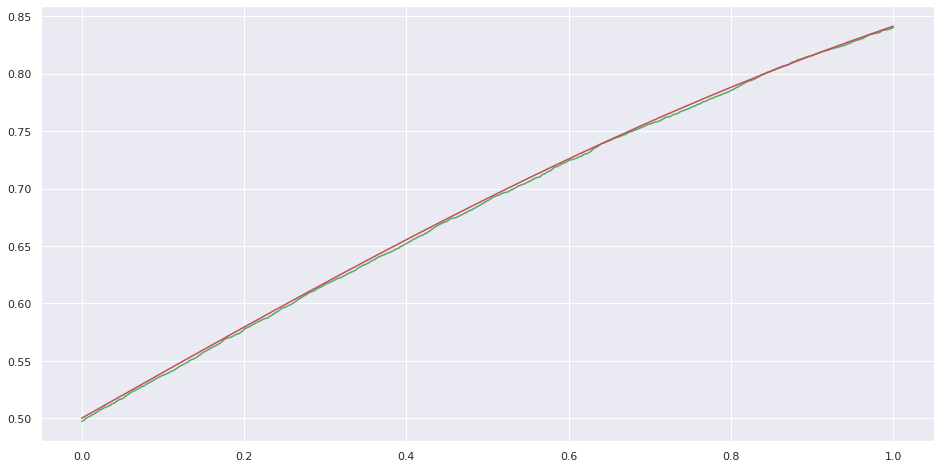

In [85]:
figure = plt.figure(figsize=[16, 8])

sns.lineplot(np.linspace(0, 1, 1000), estimated_cdf, color="g")
sns.lineplot(np.linspace(0, 1, 1000), true_cdf, color="r")
print(f"{mse(y_pred=estimated_cdf, y_true=true_cdf):.2E}")

In [86]:
for n_samples in [10, 100, 1000, 10_000]:
    ecdf = ECDF(stats.norm.rvs(size=n_samples) + (stats.uniform.rvs(size=n_samples, scale=0.2) - 0.1))

    estimated_cdf = ecdf(np.linspace(0, 1, 1000))
    true_cdf = stats.norm.cdf(np.linspace(0, 1, 1000))

    print(f"{mse(y_pred=estimated_cdf, y_true=true_cdf):.2E}")

6.55E-03
1.14E-03
8.65E-05
2.83E-06


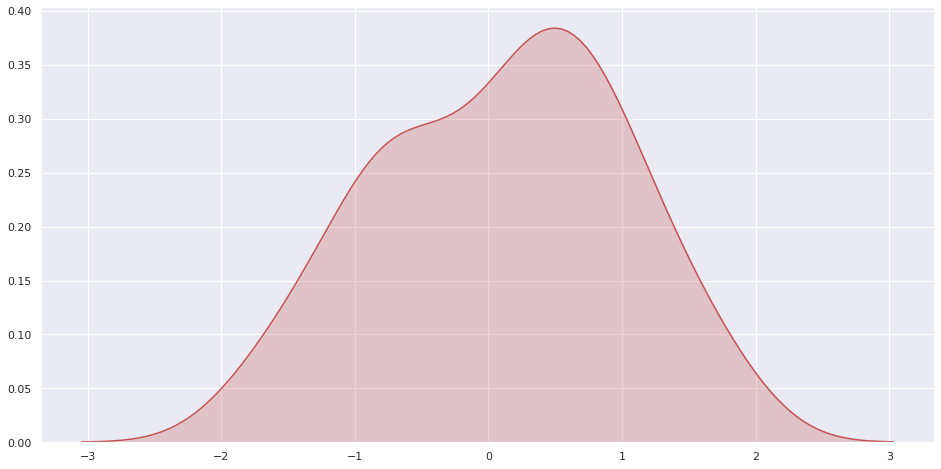

In [0]:
    figure = plt.figure(figsize=[16, 8])

sns.kdeplot(stats.norm.rvs(size=100) + stats.uniform.rvs(size=100, scale=0.1), shade=True, color="r")

In [0]:
ecdf = ECDF(data)

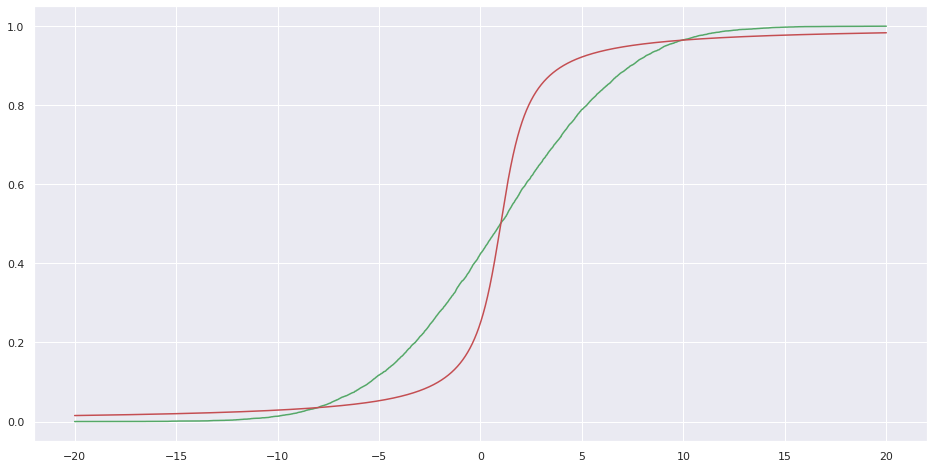

In [0]:
figure = plt.figure(figsize=[16, 8])

x = np.linspace(-20, 20, 10_000)
sns.lineplot(x, ecdf(x), color="g")
sns.lineplot(x, stats.cauchy.cdf(x, loc=1, scale=1), color="r")

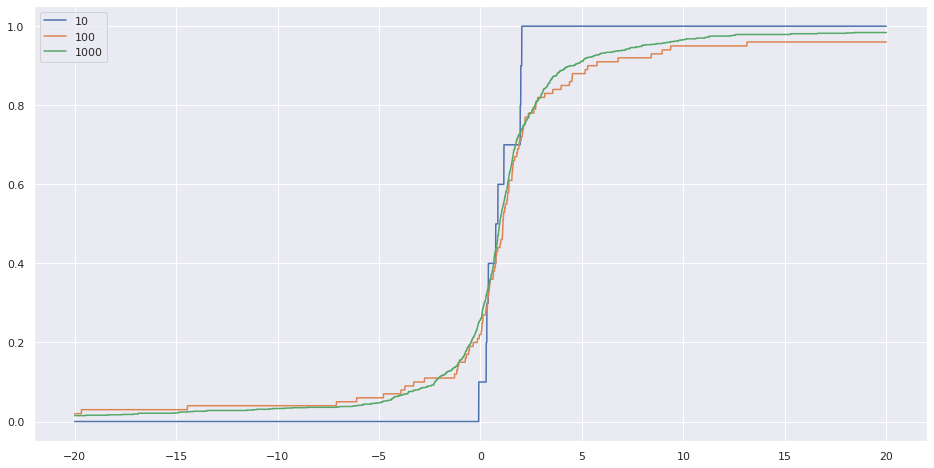

In [0]:
figure = plt.figure(figsize=[16, 8])

x = np.linspace(-20, 20, 10_000)
ecdf = ECDF(stats.cauchy.rvs(size=10, loc=1, scale=1))
sns.lineplot(x, ecdf(x))
ecdf = ECDF(stats.cauchy.rvs(size=100, loc=1, scale=1))
sns.lineplot(x, ecdf(x))
ecdf = ECDF(stats.cauchy.rvs(size=1000, loc=1, scale=1))
sns.lineplot(x, ecdf(x))

plt.legend([10, 100, 1000])

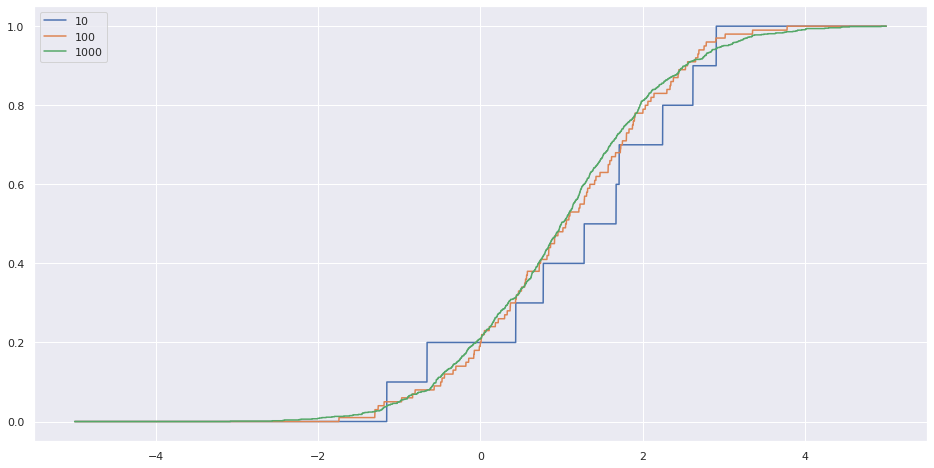

In [0]:
figure = plt.figure(figsize=[16, 8])

x = np.linspace(-5, 5, 10_000)
ecdf = ECDF(stats.norm.rvs(size=10, loc=1, scale=1.25))
sns.lineplot(x, ecdf(x))
ecdf = ECDF(stats.norm.rvs(size=100, loc=1, scale=1.25))
sns.lineplot(x, ecdf(x))
ecdf = ECDF(stats.norm.rvs(size=1000, loc=1, scale=1.25))
sns.lineplot(x, ecdf(x))

plt.legend([10, 100, 1000])

In [0]:
data_1 = np.loadtxt(os.path.join(root_path, "mid/data/model_lab_5_data_1.txt"))
print(data.min())
print(data.max())
print(np.std(data))
print(data.mean())

-19.187393
20.173964
5.00276895057368
1.4679910487999999


In [0]:
data_2 = np.loadtxt(os.path.join(root_path, "mid/data/model_lab_5_data_2.txt"))
print(data.min())
print(data.max())
print(np.std(data))
print(data.mean())

-19.187393
20.173964
5.00276895057368
1.4679910487999999


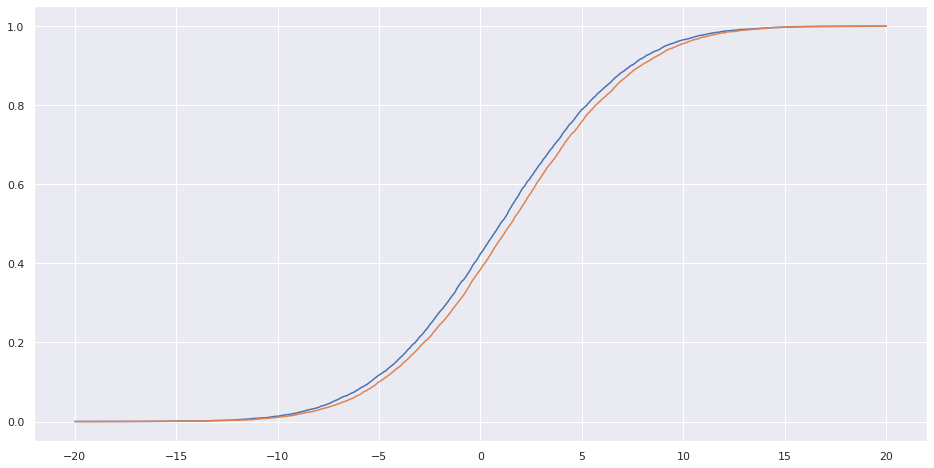

In [0]:
figure = plt.figure(figsize=[16, 8])

x = np.linspace(-20, 20, 10_000)
ecdf = ECDF(data_1)
sns.lineplot(x, ecdf(x))
ecdf = ECDF(data_2)
sns.lineplot(x, ecdf(x))

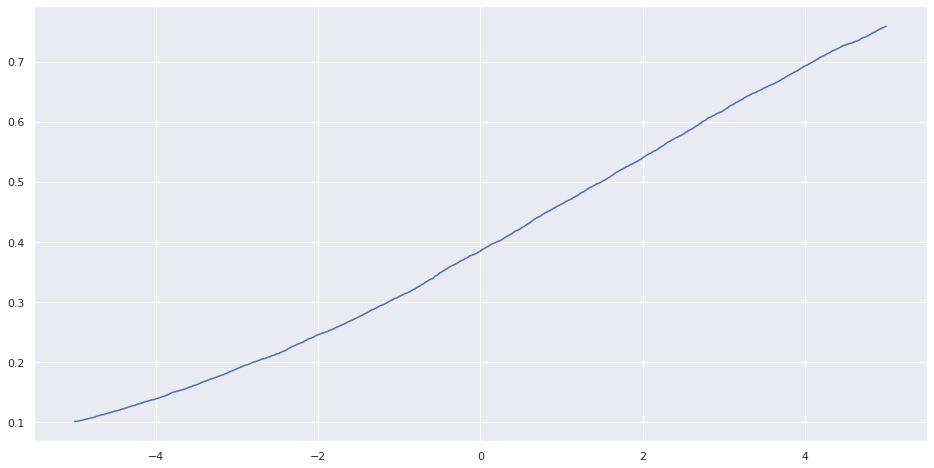

In [0]:
figure = plt.figure(figsize=[16, 8])
statsmodels_ecdf = distributions.empirical_distribution.ECDF(data)

x = np.linspace(-5, 5, 10_000)
sns.lineplot(x, statsmodels_ecdf(x))